# Import Data

In [24]:
from google.colab import files
import pandas as pd

# Unggah file CSV
uploaded = files.upload()

Saving Month_Value_1.csv to Month_Value_1 (3).csv


# Read Data

In [25]:
# Membaca file CSV yang diunggah
df = pd.read_csv(next(iter(uploaded)))
print(df.tail())

        Period  Revenue  Sales_quantity  Average_cost  \
91  01.08.2022      NaN             NaN           NaN   
92  01.09.2022      NaN             NaN           NaN   
93  01.10.2022      NaN             NaN           NaN   
94  01.11.2022      NaN             NaN           NaN   
95  01.12.2022      NaN             NaN           NaN   

    The_average_annual_payroll_of_the_region  
91                                       NaN  
92                                       NaN  
93                                       NaN  
94                                       NaN  
95                                       NaN  


In [28]:
#Exploratory Data Analysis
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


,0
Period,0
Revenue,32
Sales_quantity,32
Average_cost,32
The_average_annual_payroll_of_the_region,32


# Handling Missing Value

In [29]:
df = df.dropna()
df.isnull().sum()

,0
Period,0
Revenue,0
Sales_quantity,0
Average_cost,0
The_average_annual_payroll_of_the_region,0


# Convert Into Datetime

In [30]:
import pandas as pd

# Mengubah kolom 'Period' menjadi datetime
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')

# Menetapkan 'Period' sebagai indeks
df.set_index('Period', inplace=True)

# Melihat data
print(df.head())

                 Revenue  Sales_quantity  Average_cost  \
Period                                                   
2015-01-01  1.601007e+07         12729.0   1257.763541   
2015-02-01  1.580759e+07         11636.0   1358.507000   
2015-03-01  2.204715e+07         15922.0   1384.697024   
2015-04-01  1.881458e+07         15227.0   1235.606705   
2015-05-01  1.402148e+07          8620.0   1626.621765   

            The_average_annual_payroll_of_the_region  
Period                                                
2015-01-01                                30024676.0  
2015-02-01                                30024676.0  
2015-03-01                                30024676.0  
2015-04-01                                30024676.0  
2015-05-01                                30024676.0  


<ipython-input-30-0bff40a9f211>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')


# Checking Stationarity of Revenue Data

In [31]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Revenue'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")

# Jika p-value < 0.05, data dianggap stasioner

ADF Statistic: -0.26914893564362824
P-Value: 0.9297615379617789


# Differencing

In [32]:
# karena p-value > 0.05, data dianggap tidak stasioner. Sehingga, dilakukan differensiasi untuk data tersebut
df['Revenue_diff'] = df['Revenue'].diff().dropna()

<ipython-input-32-655de16263bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue_diff'] = df['Revenue'].diff().dropna()


# ARIMA Model

In [49]:
from statsmodels.tsa.arima.model import ARIMA

# Membuat model ARIMA
model_arima = ARIMA(df['Revenue_diff'], order=(1, 1, 1))  # (p, d, q)
model_arima_fit = model_arima.fit()

# Prediksi
forecast_arima = model_arima_fit.forecast(steps=33)  # Prediksi 33 bulan ke depan
print(forecast_arima)

2020-05-01    -52964.246131
2020-06-01    945439.834790
2020-07-01    521534.192216
2020-08-01    701517.424696
2020-09-01    625099.560151
2020-10-01    657545.304908
2020-11-01    643769.385375
2020-12-01    649618.409967
2021-01-01    647135.012137
2021-02-01    648189.421242
2021-03-01    647741.736805
2021-04-01    647931.816115
2021-05-01    647851.111625
2021-06-01    647885.377399
2021-07-01    647870.828725
2021-08-01    647877.005848
2021-09-01    647874.383145
2021-10-01    647875.496701
2021-11-01    647875.023904
2021-12-01    647875.224646
2022-01-01    647875.139414
2022-02-01    647875.175602
2022-03-01    647875.160237
2022-04-01    647875.166761
2022-05-01    647875.163991
2022-06-01    647875.165167
2022-07-01    647875.164668
2022-08-01    647875.164880
2022-09-01    647875.164790
2022-10-01    647875.164828
2022-11-01    647875.164812
2022-12-01    647875.164819
2023-01-01    647875.164816
Freq: MS, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# SARIMAX Model

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Membuat model SARIMAX (misalnya dengan musiman 12 bulan)
model_sarimax = SARIMAX(df['Revenue'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # (p, d, q), (P, D, Q, m)
model_sarimax_fit = model_sarimax.fit()

# Prediksi
forecast_sarimax = model_sarimax_fit.forecast(steps=33)  # Prediksi 33 bulan ke depan
print(forecast_sarimax)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


2020-05-01    4.174461e+07
2020-06-01    5.178514e+07
2020-07-01    5.233407e+07
2020-08-01    4.174466e+07
2020-09-01    5.381385e+07
2020-10-01    5.195407e+07
2020-11-01    4.471101e+07
2020-12-01    6.393262e+07
2021-01-01    6.044588e+07
2021-02-01    5.085241e+07
2021-03-01    6.251723e+07
2021-04-01    5.606850e+07
2021-05-01    4.919619e+07
2021-06-01    5.869444e+07
2021-07-01    5.943664e+07
2021-08-01    4.871842e+07
2021-09-01    6.082769e+07
2021-10-01    5.917868e+07
2021-11-01    5.198123e+07
2021-12-01    7.093709e+07
2022-01-01    6.736469e+07
2022-02-01    5.831532e+07
2022-03-01    7.013724e+07
2022-04-01    6.295285e+07
2022-05-01    5.639202e+07
2022-06-01    6.584468e+07
2022-07-01    6.660313e+07
2022-08-01    5.587407e+07
2022-09-01    6.798672e+07
2022-10-01    6.635543e+07
2022-11-01    5.916182e+07
2022-12-01    7.809533e+07
2023-01-01    7.451572e+07
Freq: MS, Name: predicted_mean, dtype: float64


# Prediction Visualization

<ipython-input-78-b7f15dcb7137>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=34, freq='M')[1:], forecast_arima, label='ARIMA Model', color='red')
<ipython-input-78-b7f15dcb7137>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=34, freq='M')[1:], forecast_sarimax, label='SARIMAX Model', color='orange')


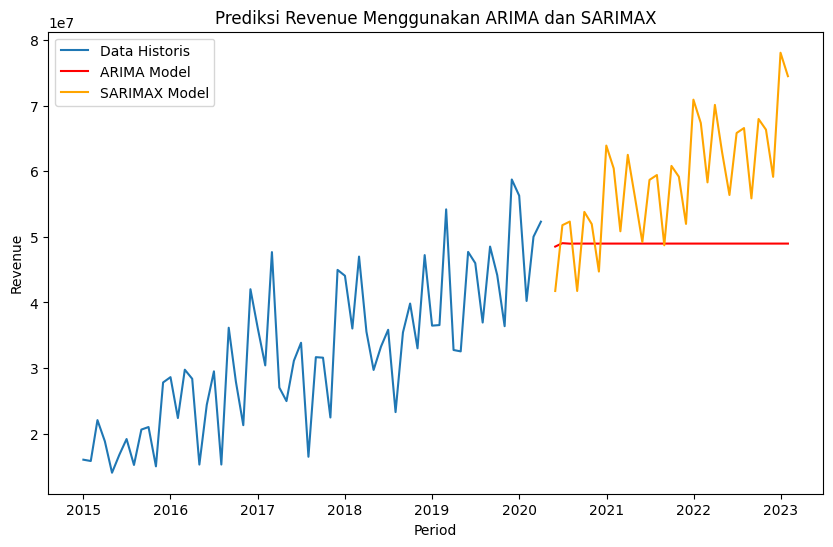

In [78]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi ARIMA dan SARIMAX
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Revenue'], label='Data Historis')
plt.plot(pd.date_range(df.index[-1], periods=34, freq='M')[1:], forecast_arima, label='ARIMA Model', color='red')
plt.plot(pd.date_range(df.index[-1], periods=34, freq='M')[1:], forecast_sarimax, label='SARIMAX Model', color='orange')
plt.xlabel('Period')
plt.ylabel('Revenue')
plt.legend()
plt.title('Prediksi Revenue Menggunakan ARIMA dan SARIMAX')
plt.show()

# Evaluation

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

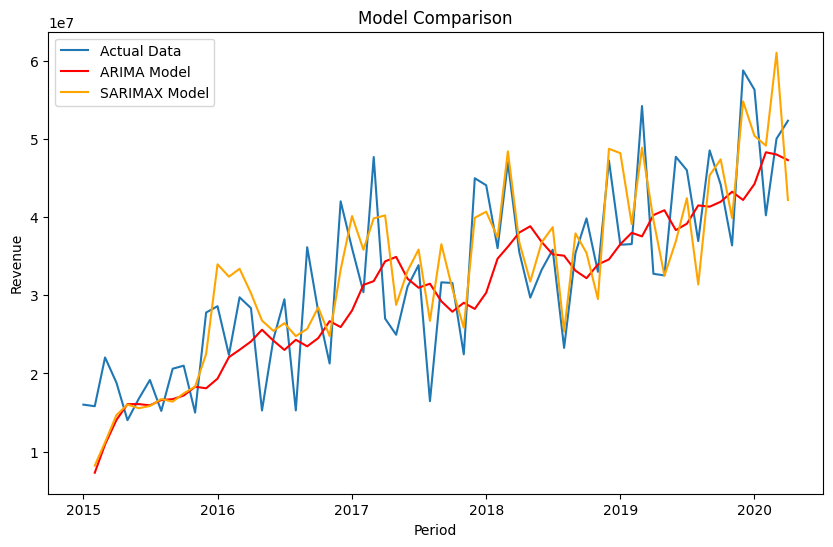

ARIMA Model MSE: 66808973671291.48
SARIMAX Model MSE: 34638789565931.008


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Asumsikan data adalah DataFrame dengan kolom 'Revenue'
data = df['Revenue']

# ARIMA Model
model_arima = ARIMA(data, order=(1, 1, 1))  # Sesuaikan order sesuai kebutuhan
model_arima_fit = model_arima.fit()  # Fitting model ARIMA
arima_pred = model_arima_fit.predict(start=1, end=len(data)-1, typ='levels')  # Mulai dari index 1

# SARIMAX Model
model_sarimax = SARIMAX(data, order=(1,1,1), seasonal_order=(1,1,1,12))  # Sesuaikan order dan seasonal_order sesuai kebutuhan
model_sarimax_fit = model_sarimax.fit()  # Fitting model SARIMAX
sarimax_pred = model_sarimax_fit.predict(start=1, end=len(data)-1, typ='levels')

# Visualisasi perbandingan
plt.figure(figsize=(10, 6))
plt.plot(data, label='Actual Data')
plt.plot(arima_pred, label='ARIMA Model', color='red')
plt.plot(sarimax_pred, label='SARIMAX Model', color='orange')
plt.xlabel('Period')
plt.ylabel('Revenue')
plt.legend()
plt.title('Model Comparison')
plt.show()

# Evaluasi model menggunakan MSE (Mean Squared Error)
arima_mse = mean_squared_error(data[1:], arima_pred)
sarimax_mse = mean_squared_error(data[1:], sarimax_pred)

print(f'ARIMA Model MSE: {arima_mse}')
print(f'SARIMAX Model MSE: {sarimax_mse}')